In [2]:
import pandas as pd
from pandas_profiling import ProfileReport
from IPython.display import HTML

df = pd.read_csv("country_vaccinations.csv")

profile = ProfileReport(df)

#If you want an html report 
#profile.to_file(output_file='rapport.html')

HTML(filename="rapport.html")

In /home/baringthon/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/baringthon/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/baringthon/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/baringthon/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/baringthon/.local/lib/python3.6/site-packages/m

In [3]:
df.keys()

Index(['country', 'iso_code', 'date', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated',
       'daily_vaccinations_raw', 'daily_vaccinations',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'daily_vaccinations_per_million',
       'vaccines', 'source_name', 'source_website'],
      dtype='object')

In [15]:
df['iso_code'].fillna('GBR', inplace=True)
df.fillna(0, inplace=True)
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date', ascending=True)
df['date'] = df['date'].dt.strftime('%m-%d-%Y')


import plotly.express as px
fig = px.choropleth(df,                            # Input Dataframe
                     locations="iso_code",           # identify country code column
                     color="total_vaccinations",                     # identify representing column
                     hover_name="country",              # identify hover name
                     animation_frame="date",        # identify date column
                     projection="natural earth",        # select projection
                     color_continuous_scale= 'Bluered_r',  # select prefer color scale
                     range_color=[0,5000000])             # select range of dataset     
fig.show()          
fig.write_html("example_map.html")            


#from IPython.display import IFrame
#IFrame(src='example_map.html', width=700, height=600)


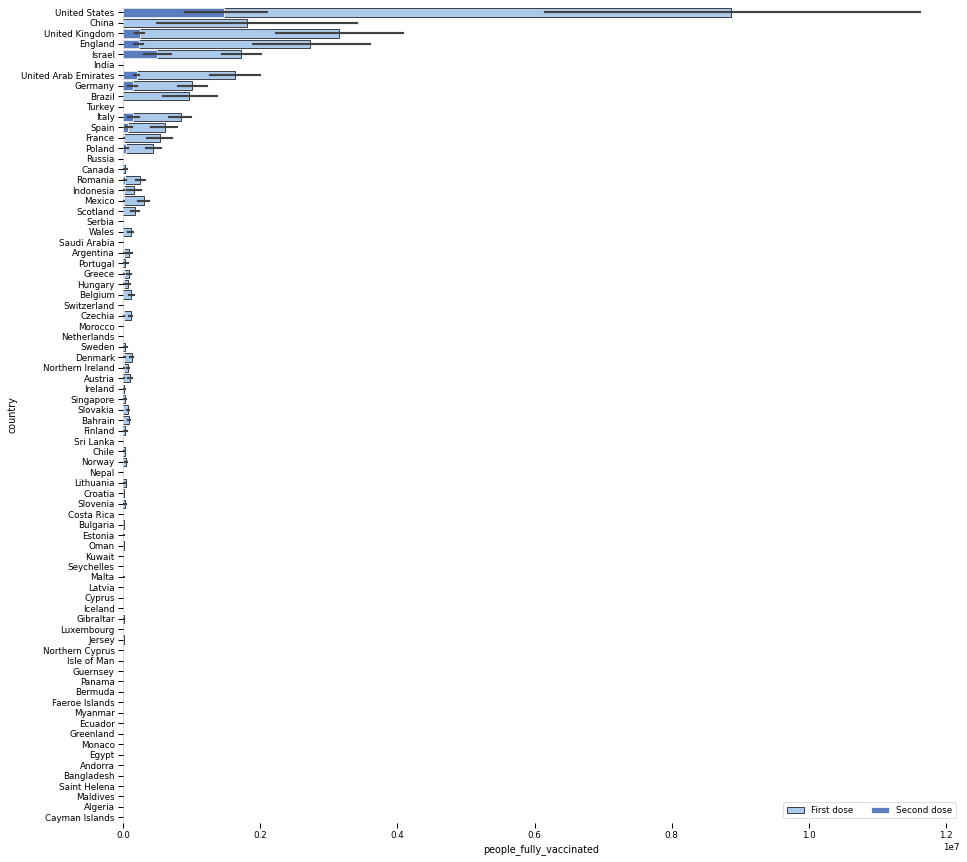

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
 
sns.set_context('paper')

crashes = df.sort_values(by = ["total_vaccinations"], ascending=False)
fig, ax = plt.subplots(figsize = (15,15))
sns.set_color_codes('pastel')
sns.barplot(x = 'people_vaccinated', y = 'country', data = crashes,
            label = 'First dose', color = 'b', edgecolor = 'k')
sns.set_color_codes('muted')
sns.barplot(x = 'people_fully_vaccinated', y = 'country', data = crashes,
            label = 'Second dose', color = 'b', edgecolor = 'w')
ax.legend(ncol = 2, loc = 'lower right')
sns.despine(left = True, bottom = True)
plt.show()

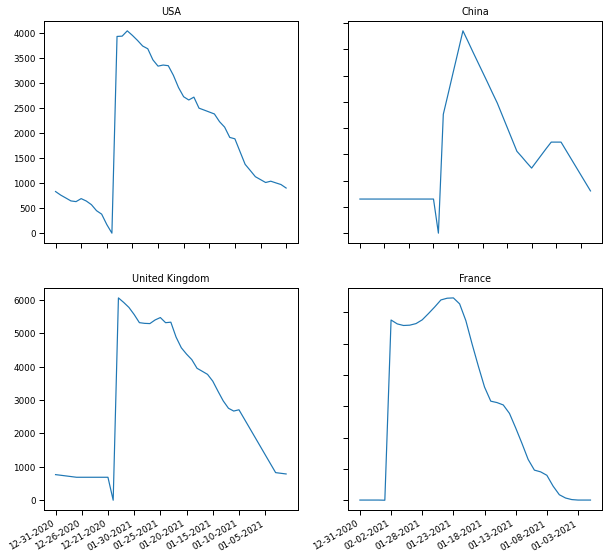

In [67]:
dat = df.sort_values(by = ["date"], ascending = False)
fig, ax = plt.subplots(2,2, figsize=(10, 10))

ax[0, 0].plot(dat.loc[dat["iso_code"]=="USA","date"], dat.loc[dat["iso_code"]=="USA","daily_vaccinations_per_million"])
ax[0, 0].set_title('USA')
ax[0, 1].plot(dat.loc[dat["iso_code"]=="CHN","date"], dat.loc[dat["iso_code"]=="CHN","daily_vaccinations_per_million"])
ax[0, 1].set_title('China')
ax[1, 0].plot(dat.loc[dat["country"]=='United Kingdom',"date"], dat.loc[dat["country"]=='United Kingdom',"daily_vaccinations_per_million"])
ax[1, 0].set_title('United Kingdom')
ax[1, 1].plot(dat.loc[dat["iso_code"]=="FRA","date"], dat.loc[dat["iso_code"]=="FRA","daily_vaccinations_per_million"])
ax[1, 1].set_title('France')
# rotate and align the tick labels so they look better
ax[0,0].set_xticks(ax[0,0].get_xticks()[::5])
ax[0,1].set_xticks(ax[0,1].get_xticks()[::5])
ax[1,0].set_xticks(ax[1,0].get_xticks()[::5])
ax[1,1].set_xticks(ax[1,1].get_xticks()[::5])
fig.autofmt_xdate()

for ax in fig.get_axes():
    ax.label_outer()